## Facial Landmark Detection uning OpenCV

In [1]:
## import libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np
import urllib.request as urlreq
import os
from pylab import rcParams
%matplotlib inline

In [2]:
## Global Variables
## Matplotlib variables
w=10
h=10
columns = 1
rows = 1


In [3]:
# Load Image func - 
def loadImage(x):
    source = './data/image_'+str(x)+'.jpg'
    img = cv2.imread(source)
    return img

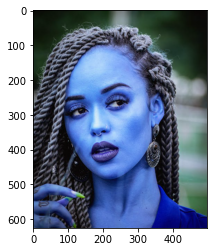

In [4]:
fig=plt.figure(figsize=(6, 4))
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(loadImage(68))
plt.show()

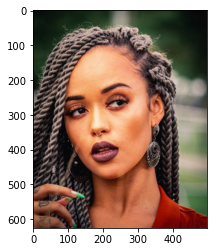

In [8]:
# convert image to RGB colour
image_rgb = cv2.cvtColor(loadImage(68), cv2.COLOR_BGR2RGB)

# plot image with matplotlib package
plt.imshow(image_rgb)

Faces:
 [[ 30 144 330 330]]


Text(0.5, 1.0, 'Face Detection')

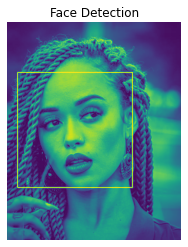

In [7]:
# save face detection algorithm's name as haarcascade
haarcascade = "./haar/haarcascade_frontalface_alt2.xml"

# create an instance of the Face Detection Cascade Classifier
detector = cv2.CascadeClassifier(haarcascade)

# Detect faces using the haarcascade classifier on the "grayscale image"
faces = detector.detectMultiScale(img)

# Print coordinates of detected faces
print("Faces:\n", faces)

for face in faces:
#     save the coordinates in x, y, w, d variables
    (x,y,w,d) = face
    # Draw a white coloured rectangle around each face using the face's coordinates
    # on the "image_template" with the thickness of 2 
    cv2.rectangle(img,(x,y),(x+w, y+d),(255, 255, 255), 2)

plt.axis("off")
plt.imshow(img)
plt.title('Face Detection')

In [8]:
# save facial landmark detection model's name as LBFmodel
LBFmodel = "lbfmodel.yaml"

# create an instance of the Facial landmark Detector with the model
landmark_detector  = cv2.face.createFacemarkLBF()
landmark_detector.loadModel(LBFmodel)

# Detect landmarks on "image_gray"
_, landmarks = landmark_detector.fit(img, faces)

for landmark in landmarks:
    for x,y in landmark[0]:
		# display landmarks on "image_cropped"
		# with white colour in BGR and thickness 1
        cv2.circle(img, (x, y), 1, (255, 255, 255), 1)
plt.axis("off")
plt.imshow(img)

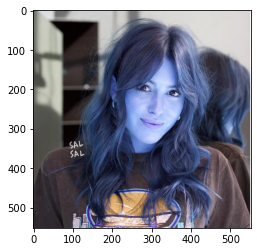

In [2]:
# save picture's url in pics_url variable
pics_url = "https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fstatic.onecms.io%2Fwp-content%2Fuploads%2Fsites%2F24%2F2018%2F12%2Fshag-brunete_0.jpg&q=85"

# save picture's name as pic
pic = "image.jpg"

# download picture from url and save locally as image.jpg
urlreq.urlretrieve(pics_url, pic)

# read image with openCV
image = cv2.imread(pic)

# plot image with matplotlib package
plt.imshow(image)

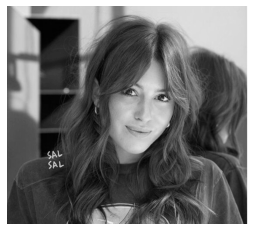

In [4]:
# convert image to RGB colour
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# plot image with matplotlib package
plt.imshow(image_rgb)

# set dimension for cropping image
x, y, width, depth = 0, 0, 950, 500
image_cropped = image_rgb[y:(y+depth), x:(x+width)]

# create a copy of the cropped image to be used later
image_template = image_cropped.copy()

# convert image to Grayscale
image_gray = cv2.cvtColor(image_cropped, cv2.COLOR_BGR2GRAY)

# remove axes and show image
plt.axis("off")
plt.imshow(image_gray, cmap = "gray")

Faces:
 [[227 141 178 178]]


Text(0.5, 1.0, 'Face Detection')

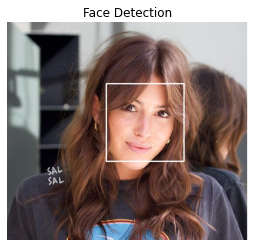

In [5]:
# save face detection algorithm's name as haarcascade
haarcascade = "./haar/haarcascade_frontalface_alt2.xml"

# create an instance of the Face Detection Cascade Classifier
detector = cv2.CascadeClassifier(haarcascade)

# Detect faces using the haarcascade classifier on the "grayscale image"
faces = detector.detectMultiScale(image_gray)

# Print coordinates of detected faces
print("Faces:\n", faces)

for face in faces:
#     save the coordinates in x, y, w, d variables
    (x,y,w,d) = face
    # Draw a white coloured rectangle around each face using the face's coordinates
    # on the "image_template" with the thickness of 2 
    cv2.rectangle(image_template,(x,y),(x+w, y+d),(255, 255, 255), 2)

plt.axis("off")
plt.imshow(image_template)
plt.title('Face Detection')

In [6]:
# save facial landmark detection model's url in LBFmodel_url variable
LBFmodel_url = "https://github.com/kurnianggoro/GSOC2017/raw/master/data/lbfmodel.yaml"

# save facial landmark detection model's name as LBFmodel
LBFmodel = "lbfmodel.yaml"

# check if file is in working directory
if (LBFmodel in os.listdir(os.curdir)):
    print("File exists")
else:
    # download picture from url and save locally as lbfmodel.yaml, < 54MB
    urlreq.urlretrieve(LBFmodel_url, LBFmodel)
    print("File downloaded")

# create an instance of the Facial landmark Detector with the model
landmark_detector  = cv2.face.createFacemarkLBF()
landmark_detector.loadModel(LBFmodel)

# Detect landmarks on "image_gray"
_, landmarks = landmark_detector.fit(image_gray, faces)

for landmark in landmarks:
    for x,y in landmark[0]:
		# display landmarks on "image_cropped"
		# with white colour in BGR and thickness 1
        cv2.circle(image_cropped, (x, y), 1, (255, 0, 0), 1)
plt.axis("off")
plt.imshow(image_cropped)

File exists
